<a href="https://colab.research.google.com/github/AAA-0-AAA/AAA-0-AAA-IBM-HR-Analytics-Employee-Attrition-Performance/blob/main/ibm_hr_analytics_employee_attrition_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBM HR Analytics Employee Attrition & Performance/data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,No,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,...,2,2,3,2,2,2,1,intern,0,4
1,27,No,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,5,2,3,5,3,0,3,intern,0,1
2,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,1,142,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,No,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


In [ ]:
df.describe()

,Age,DailyAchievement,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyAchievement,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Incentive,RemoteWork
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,1183.386395,2.824490
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,1429.687536,1.229521
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,727.500000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1817.000000,4.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,8584.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyAchievement          1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyAchievement         1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,No,Travel_Rarely,1280,Research & Development,7,1,Medical,143,4,...,2,2,3,2,2,2,1,intern,0,4
1,27,No,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1259,1,...,5,2,3,5,3,0,3,intern,0,1
2,25,Yes,Travel_Rarely,240,Sales,5,3,Marketing,142,3,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,No,Travel_Rarely,440,Research & Development,21,3,Medical,221,3,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,364,1,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
1465,39,No,Travel_Rarely,1089,Research & Development,6,3,Life Sciences,1525,2,...,9,3,3,2,0,2,2,New_graduate_recruitment,774,3
1466,32,No,Non-Travel,1146,Research & Development,15,4,Medical,1955,3,...,9,6,3,5,1,1,2,New_graduate_recruitment,3333,5
1467,35,No,Travel_Frequently,853,Sales,18,5,Life Sciences,74,2,...,9,3,2,9,8,1,8,agent_A,1962,3
1468,28,No,Travel_Rarely,995,Research & Development,9,3,Medical,930,3,...,6,2,3,2,2,2,2,intern,1188,3
1469,43,No,Travel_Rarely,930,Research & Development,6,3,Medical,1402,1,...,20,3,1,20,7,1,8,New_graduate_recruitment,2040,3


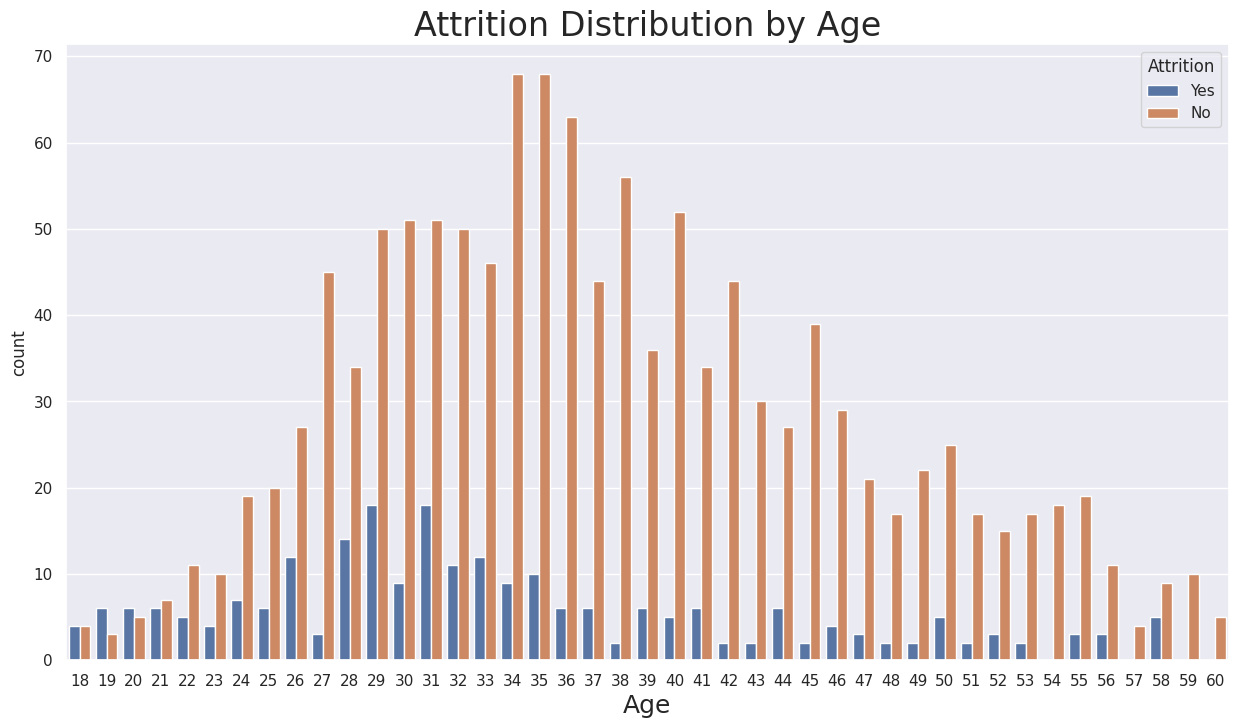

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Age', hue="Attrition", data=df)
plt.title('Attrition Distribution by Age', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.show()

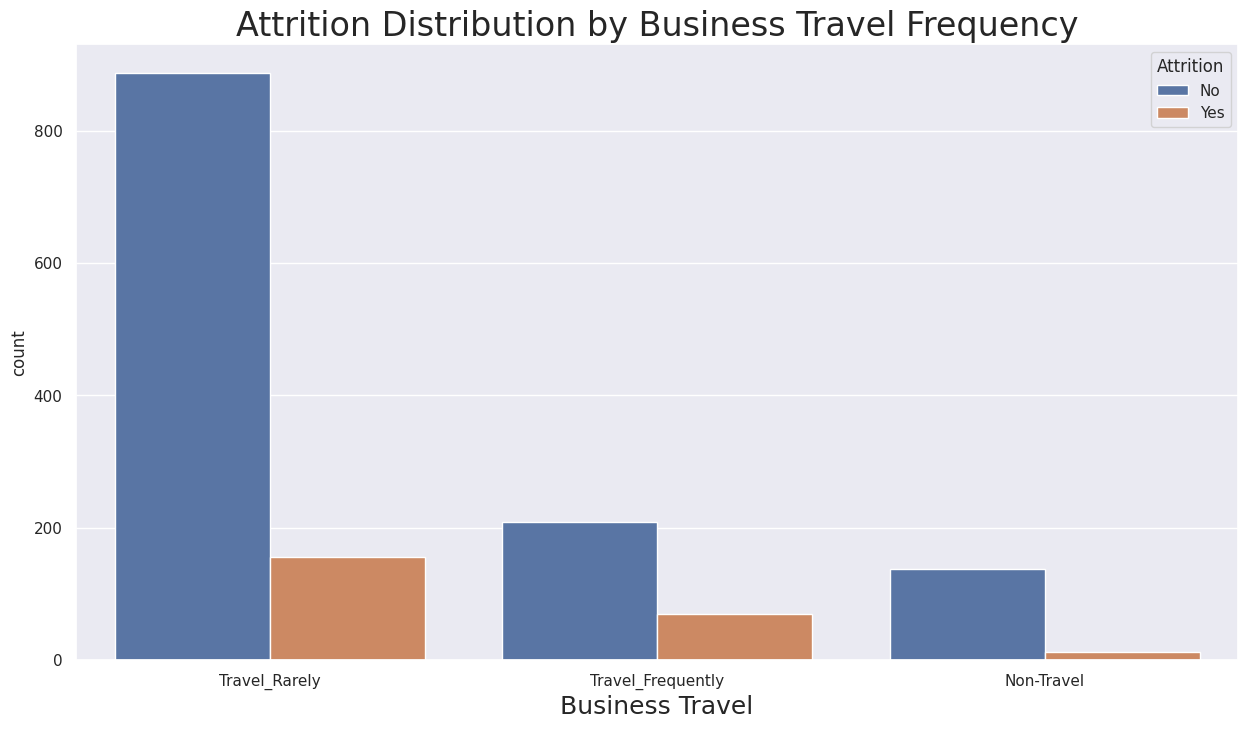

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='BusinessTravel', hue="Attrition", data=df)
plt.title('Attrition Distribution by Business Travel Frequency', fontsize=24)
plt.xlabel('Business Travel', fontsize=18)
plt.show()

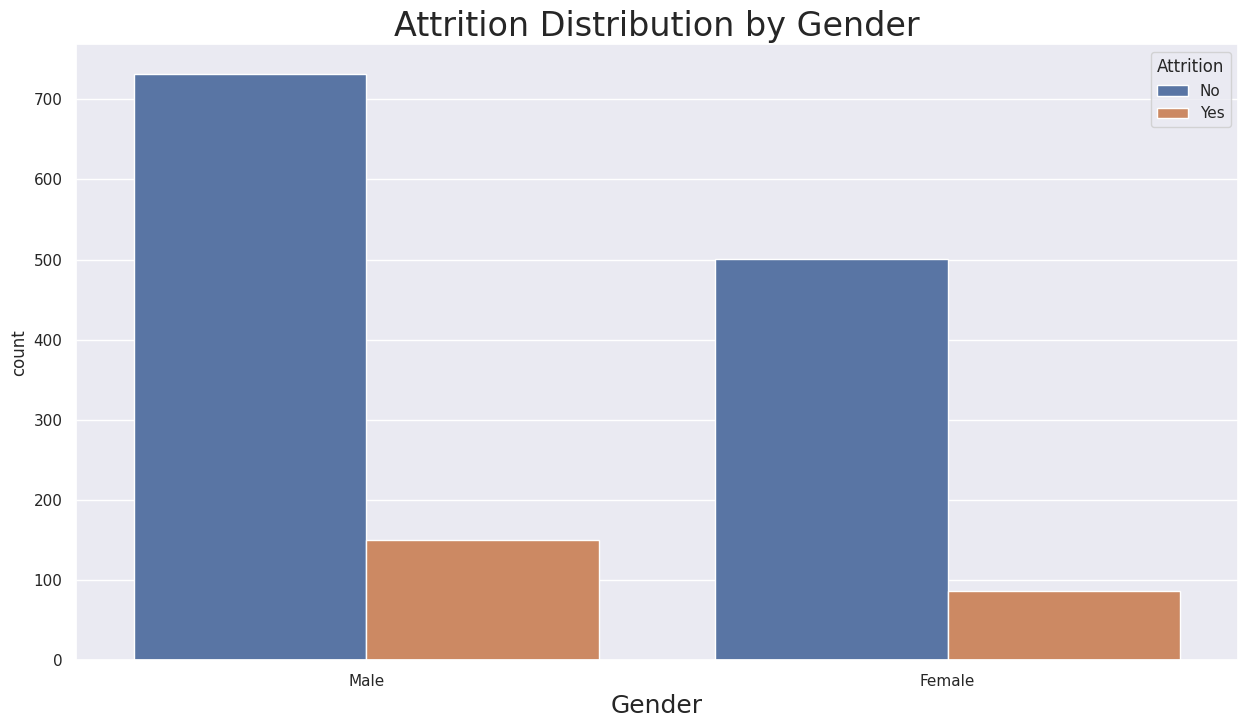

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Gender', hue="Attrition", data=df)
plt.title('Attrition Distribution by Gender', fontsize=24)
plt.xlabel('Gender', fontsize=18)
plt.show()

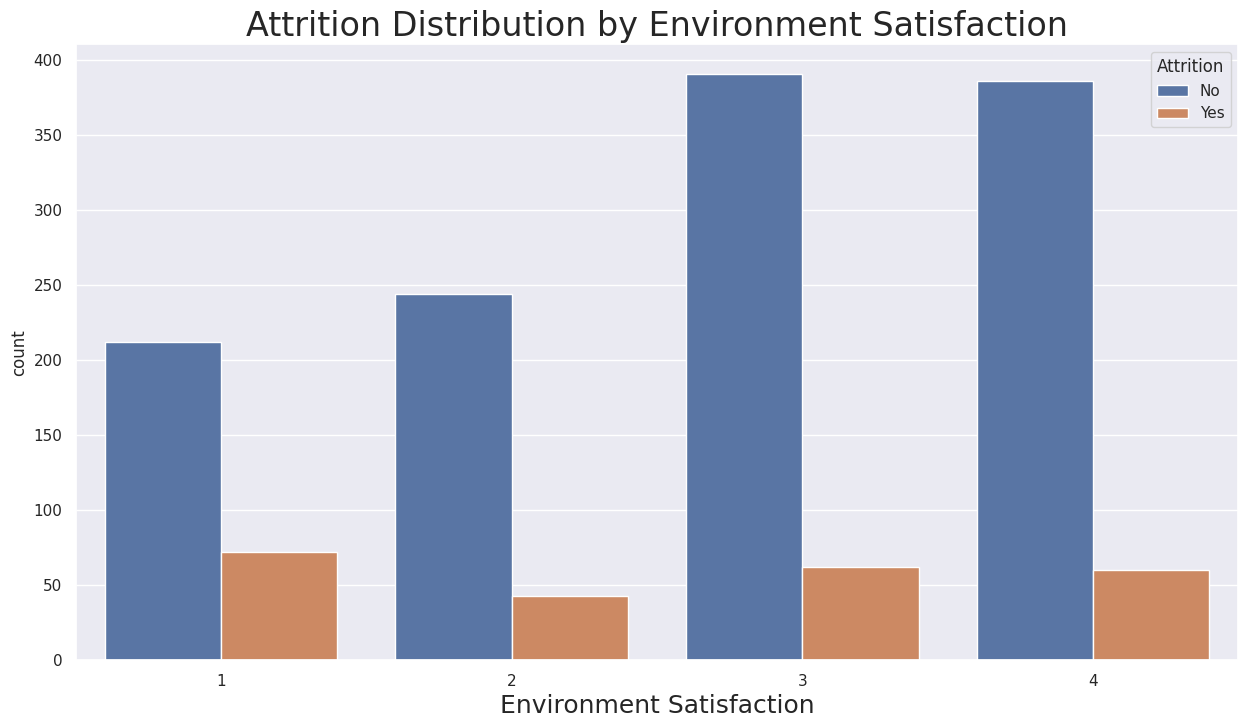

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='EnvironmentSatisfaction', hue="Attrition", data=df)
plt.title('Attrition Distribution by Environment Satisfaction', fontsize=24)
plt.xlabel('Environment Satisfaction', fontsize=18)
plt.show()

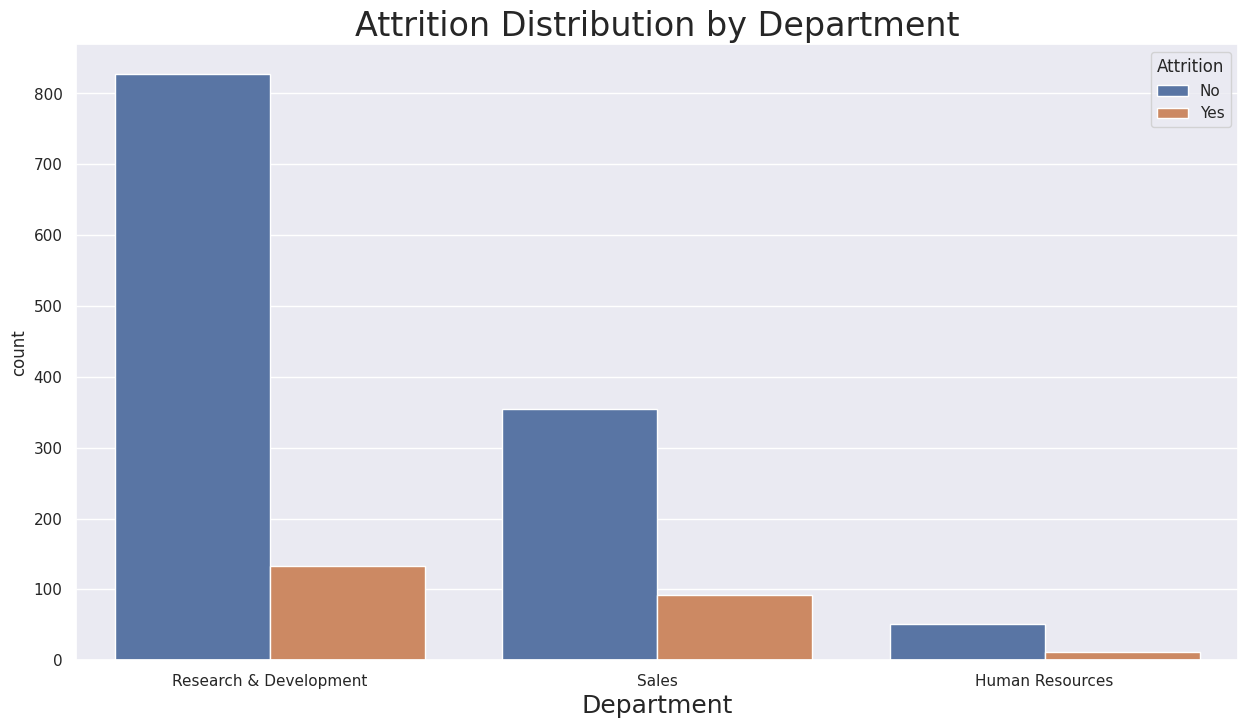

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Department', hue="Attrition", data=df)
plt.title('Attrition Distribution by Department', fontsize=24)
plt.xlabel('Department', fontsize=18)
plt.show()

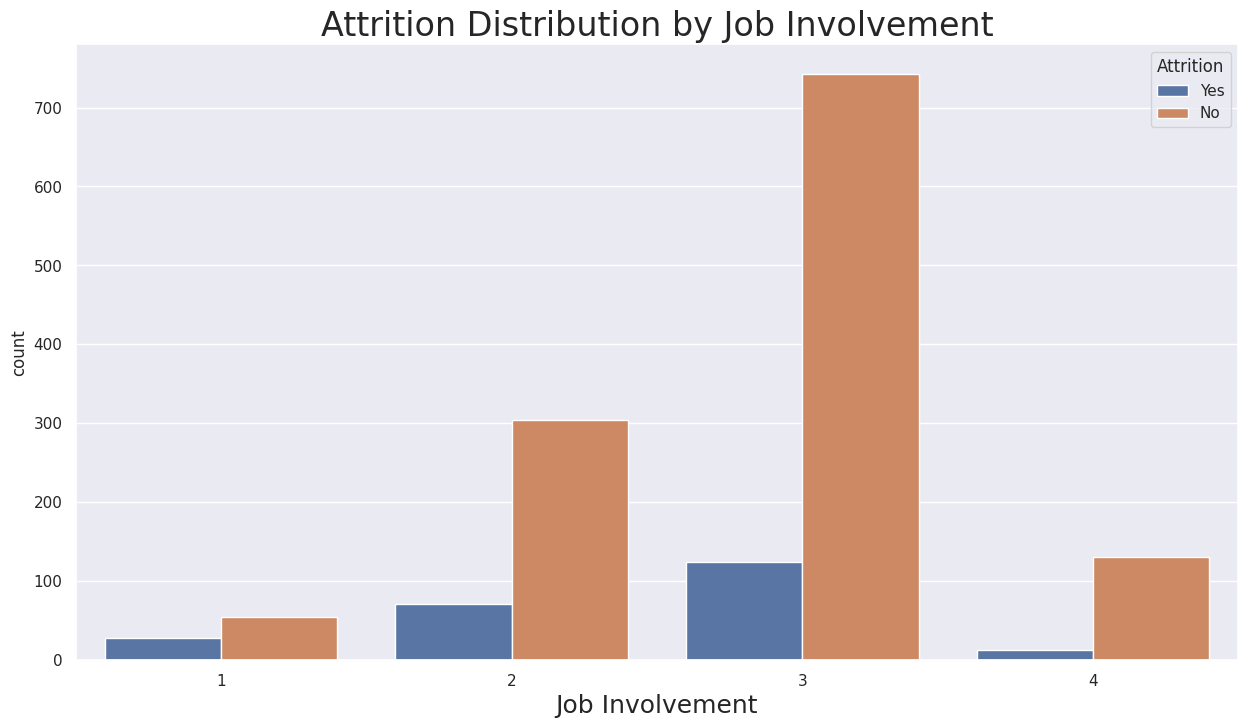

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='JobInvolvement', hue="Attrition", data=df)
plt.title('Attrition Distribution by Job Involvement', fontsize=24)
plt.xlabel('Job Involvement', fontsize=18)
plt.show()

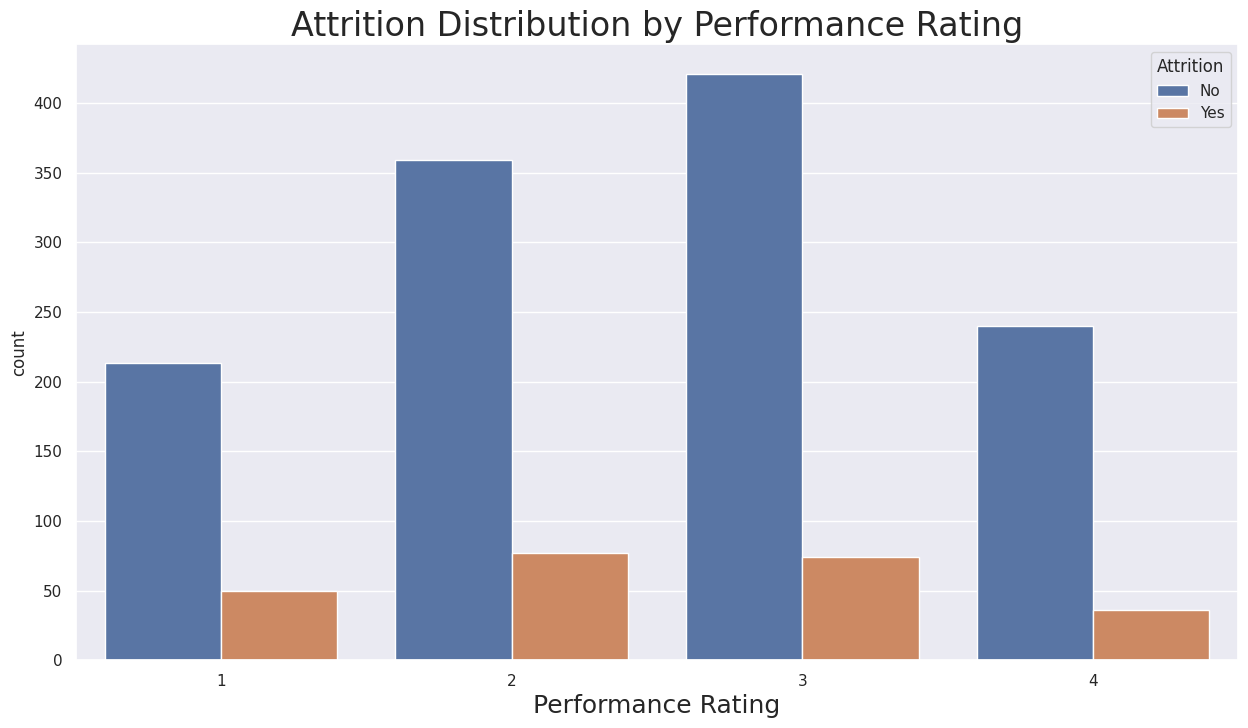

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='PerformanceRating', hue="Attrition", data=df)
plt.title('Attrition Distribution by Performance Rating', fontsize=24)
plt.xlabel('Performance Rating', fontsize=18)
plt.show()

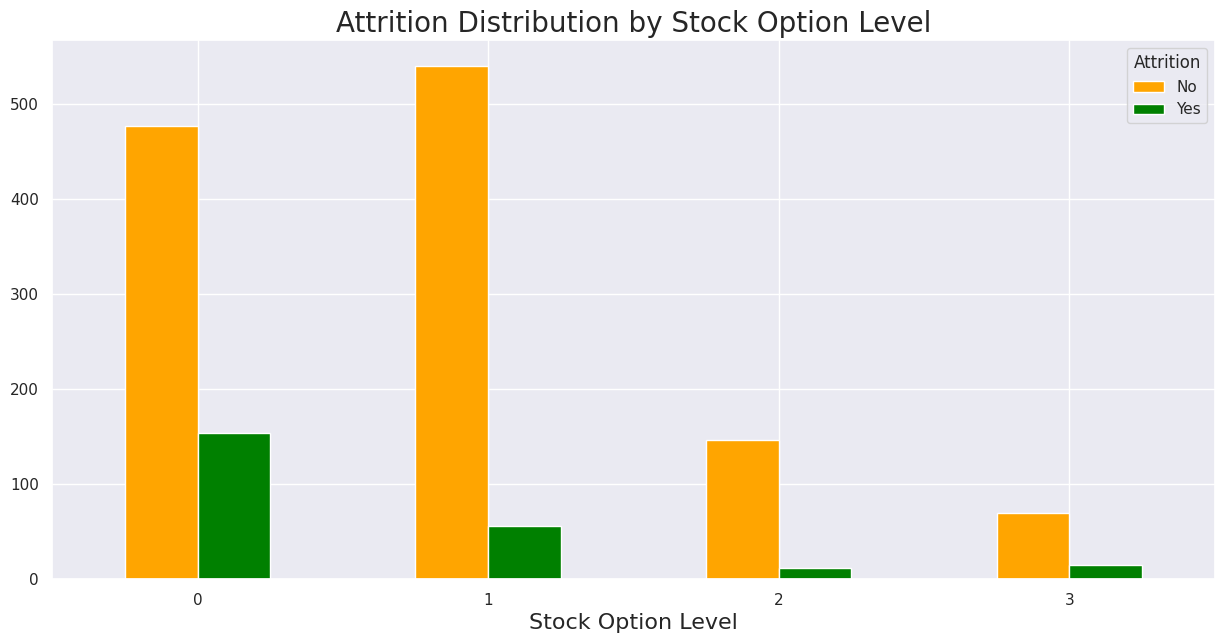

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
stockoption_group = df.groupby(['StockOptionLevel','Attrition']).size().reset_index(name='number')
stockoption_group = stockoption_group.pivot(columns='Attrition', index='StockOptionLevel', values = 'number')
stockoption_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Attrition Distribution by Stock Option Level', fontsize=20)
plt.xlabel('Stock Option Level', fontsize=16)
plt.show()

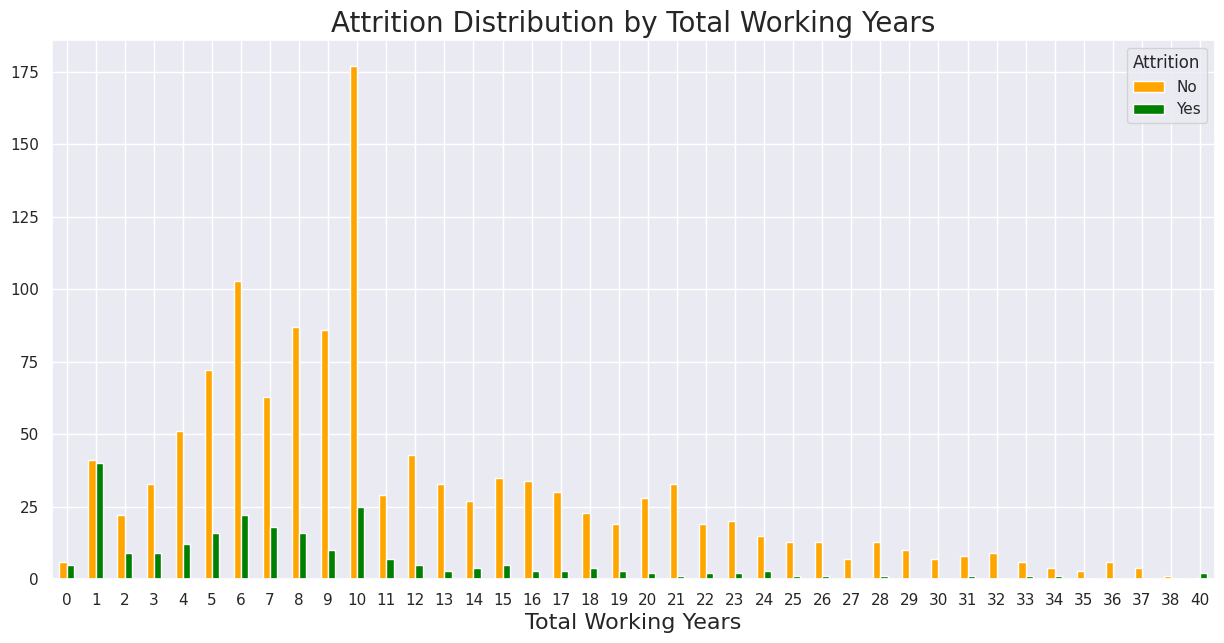

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
working_years_group = df.groupby(['TotalWorkingYears','Attrition']).size().reset_index(name='number')
working_years_group = working_years_group.pivot(columns='Attrition', index='TotalWorkingYears', values = 'number')
working_years_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Attrition Distribution by Total Working Years', fontsize=20)
plt.xlabel('Total Working Years', fontsize=16)
plt.show()

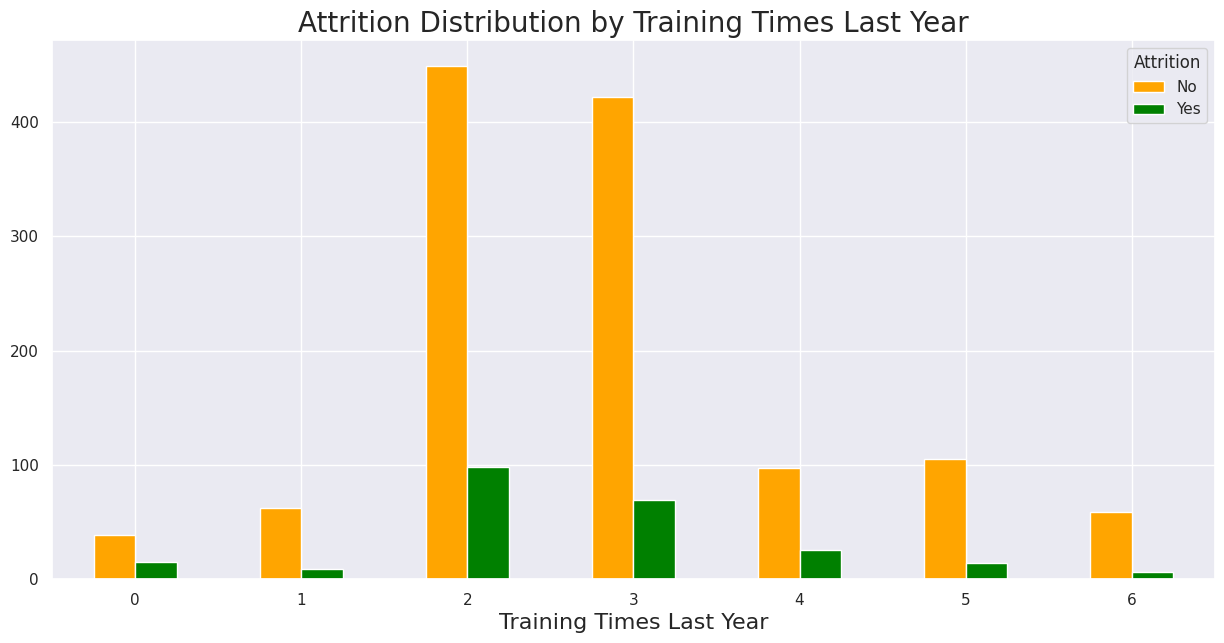

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
training_times_group = df.groupby(['TrainingTimesLastYear','Attrition']).size().reset_index(name='number')
training_times_group = training_times_group.pivot(columns='Attrition', index='TrainingTimesLastYear', values = 'number')
training_times_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Attrition Distribution by Training Times Last Year', fontsize=20)
plt.xlabel('Training Times Last Year', fontsize=16)
plt.show()

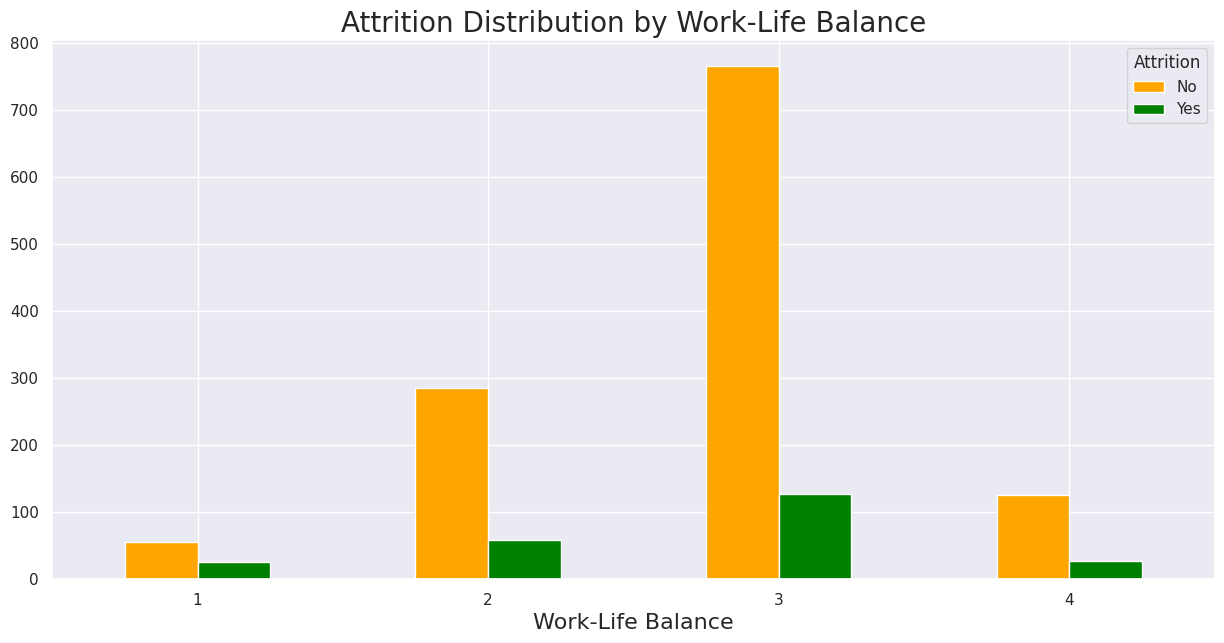

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
work_life_balance = df.groupby(['WorkLifeBalance','Attrition']).size().reset_index(name='number')
work_life_balance = work_life_balance.pivot(columns='Attrition', index='WorkLifeBalance', values = 'number')
work_life_balance.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Attrition Distribution by Work-Life Balance', fontsize=20)
plt.xlabel('Work-Life Balance', fontsize=16)
plt.show()

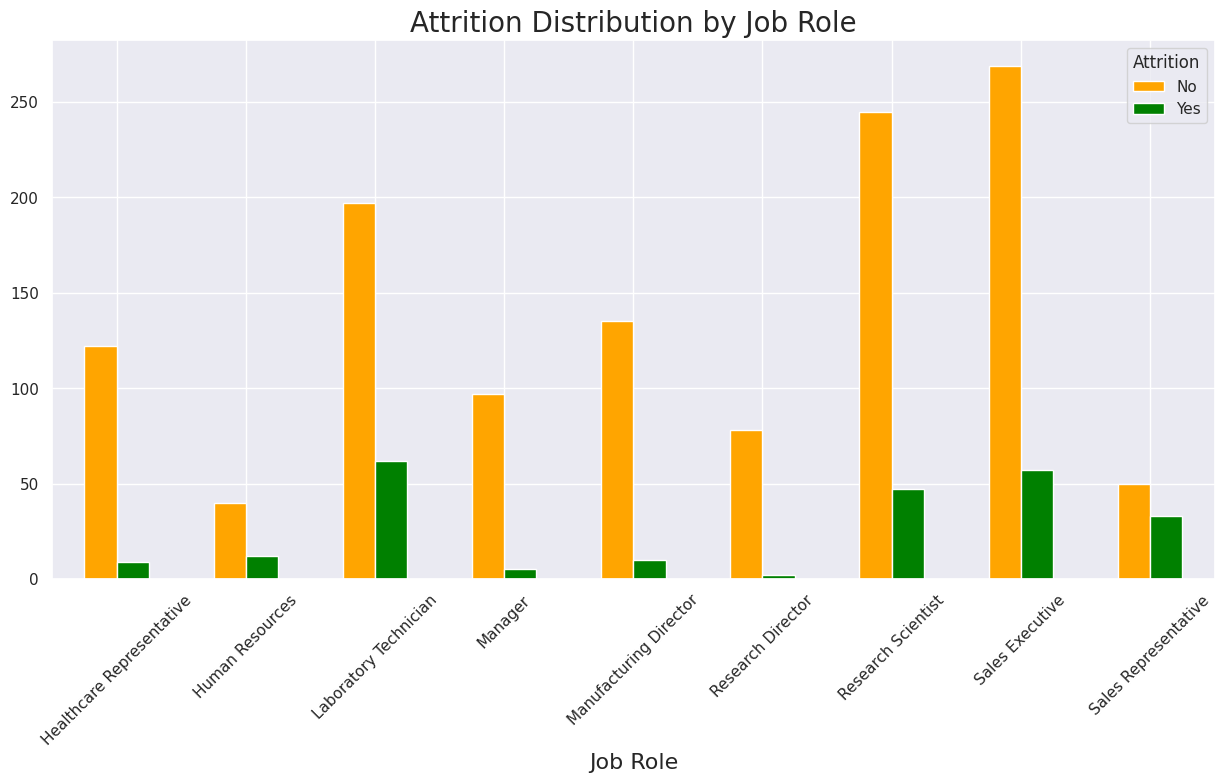

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
job_role = df.groupby(['JobRole','Attrition']).size().reset_index(name='number')
job_role = job_role.pivot(columns='Attrition', index='JobRole', values = 'number')
job_role.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=45)
plt.title('Attrition Distribution by Job Role', fontsize=20)
plt.xlabel('Job Role', fontsize=16)
plt.show()

In [ ]:
df_2 = df.copy()
df_2['Attrition'] = df_2['Attrition'].apply(lambda x: 0 if x=='No' else 1)
df_2['Gender'] = df_2['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_2['OverTime'] = df_2['OverTime'].apply(lambda x: 0 if x=='No' else 1)

BusinessTravel_map = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df_2['BusinessTravel'] = df_2['BusinessTravel'].map(BusinessTravel_map)

MaritalStatus_map = {'Single':0, 'Divorced':1, 'Married':2}
df_2['MaritalStatus'] = df_2['MaritalStatus'].map(MaritalStatus_map)

EducationField_map = {'Other':0, 'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,
                     'Human Resources':5}
df_2['EducationField'] = df_2['EducationField'].map(EducationField_map)

JobRole_map = {'Sales Executive':0,'Sales Representative':1,'Laboratory Technician':2,'Manufacturing Director':3,
              'Healthcare Representative':4,'Manager':5,'Research Scientist':6,'Research Director':7,'Human Resources':8}
df_2['JobRole'] = df_2['JobRole'].map(JobRole_map)

Department_map = {'Sales':0, 'Research & Development':1, 'Human Resources':2}
df_2['Department'] = df_2['Department'].map(Department_map)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyAchievement          1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   int64 
 11  HourlyAchievement         1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

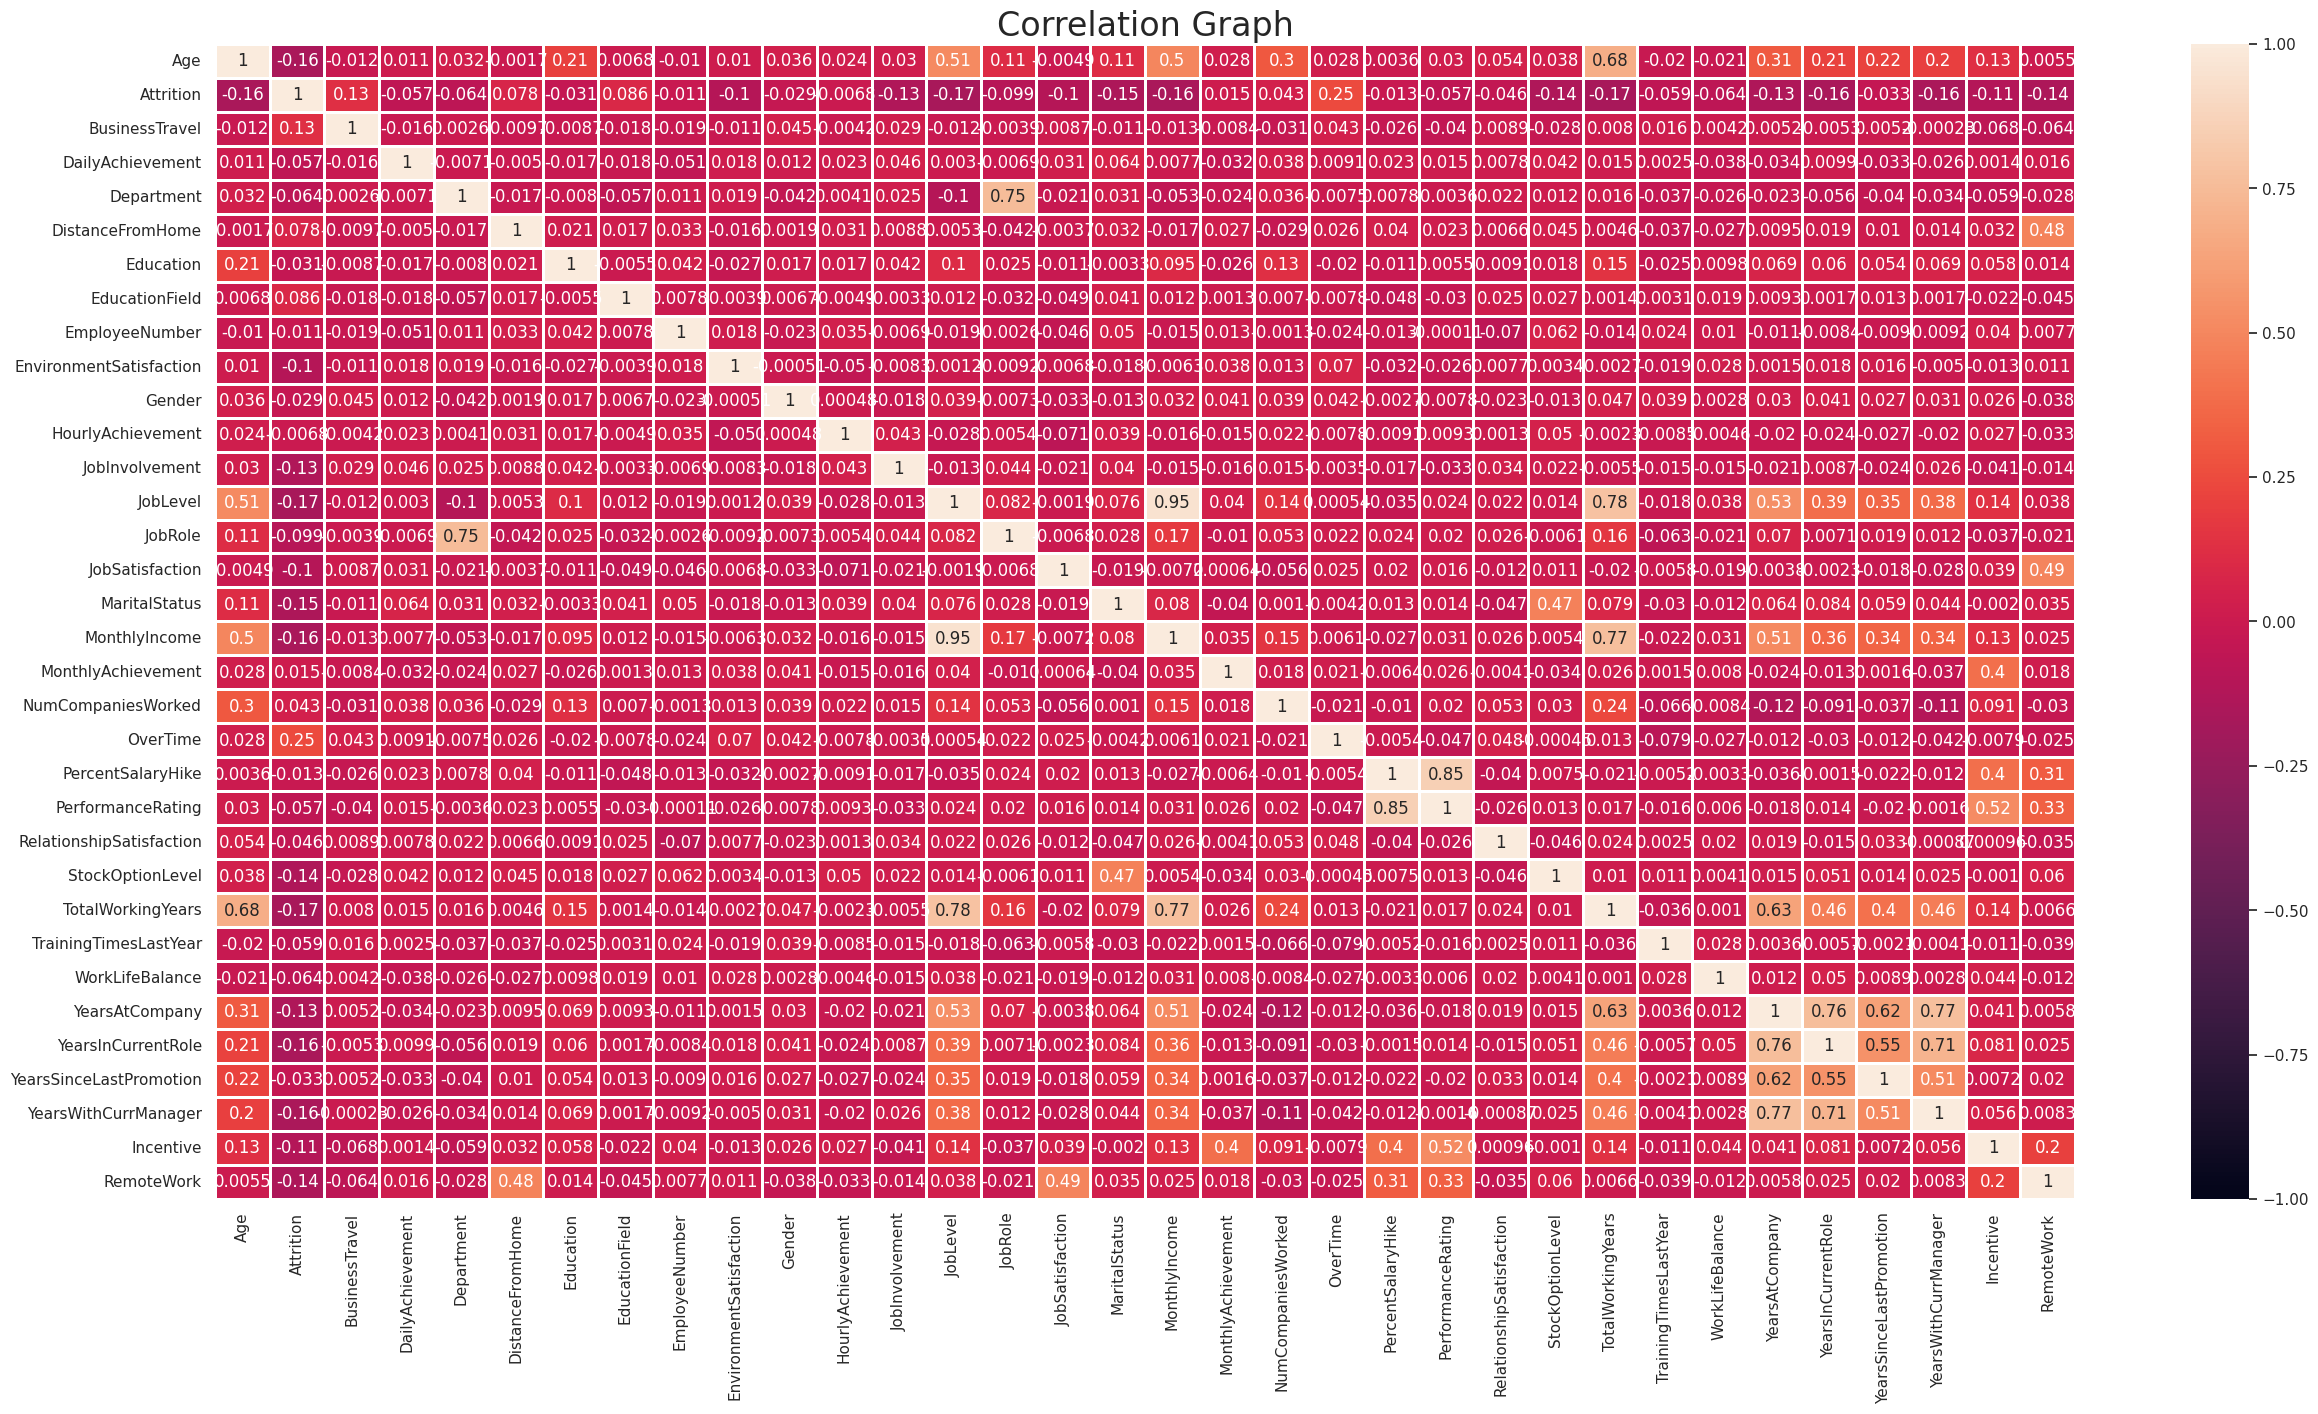

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 数値列のみを選択
df_numeric = df_2.select_dtypes(include=[float, int])

# ヒートマップをプロット
plt.figure(figsize=(30, 15))
correlation = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, linewidths=1)
correlation.set_title('Correlation Graph', fontdict={'fontsize': 24})
plt.show()

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 文字列データを数値に変換
label_encoder = LabelEncoder()
X_train_encoded = X_train.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
X_test_encoded = X_test.apply(lambda col: label_encoder.transform(col) if col.dtype == 'object' else col)

# モデルの訓練
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train_encoded, y_train)
y_pred = clf.predict(X_test_encoded)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8344671201814059


In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
442,0,0
1091,1,0
981,0,0
785,0,0
1332,0,0
...,...,...
817,0,0
399,0,0
458,0,0
406,0,0


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

,0
OverTime,0.149816
MonthlyIncome,0.106107
RemoteWork,0.080911
Age,0.073672
TotalWorkingYears,0.052235
YearsAtCompany,0.051389
StockOptionLevel,0.050656
JobLevel,0.044745
Incentive,0.042195
DistanceFromHome,0.038369


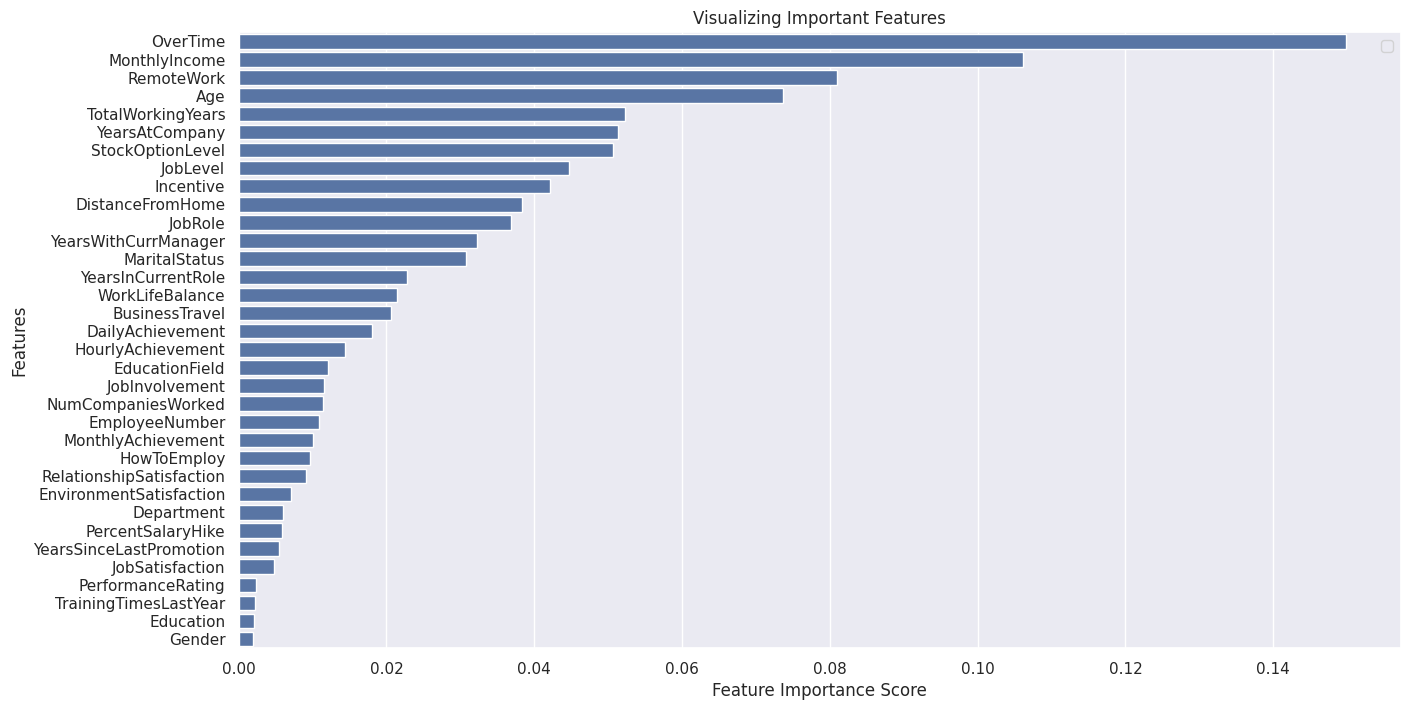

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(rc={"figure.figsize": (20,15)})
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# 文字列データを数値に変換
label_encoder = LabelEncoder()
X_train_encoded = X_train.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
X_test_encoded = X_test.apply(lambda col: label_encoder.transform(col) if col.dtype == 'object' else col)

# ロジスティック回帰モデルの訓練
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred = logreg.predict(X_test_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
result_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_2

,Actual,Predicted
442,0,0
1091,1,0
981,0,0
785,0,0
1332,0,0
...,...,...
817,0,0
399,0,0
458,0,0
406,0,0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8344671201814059
Precision: 1.0
Recall: 0.02666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


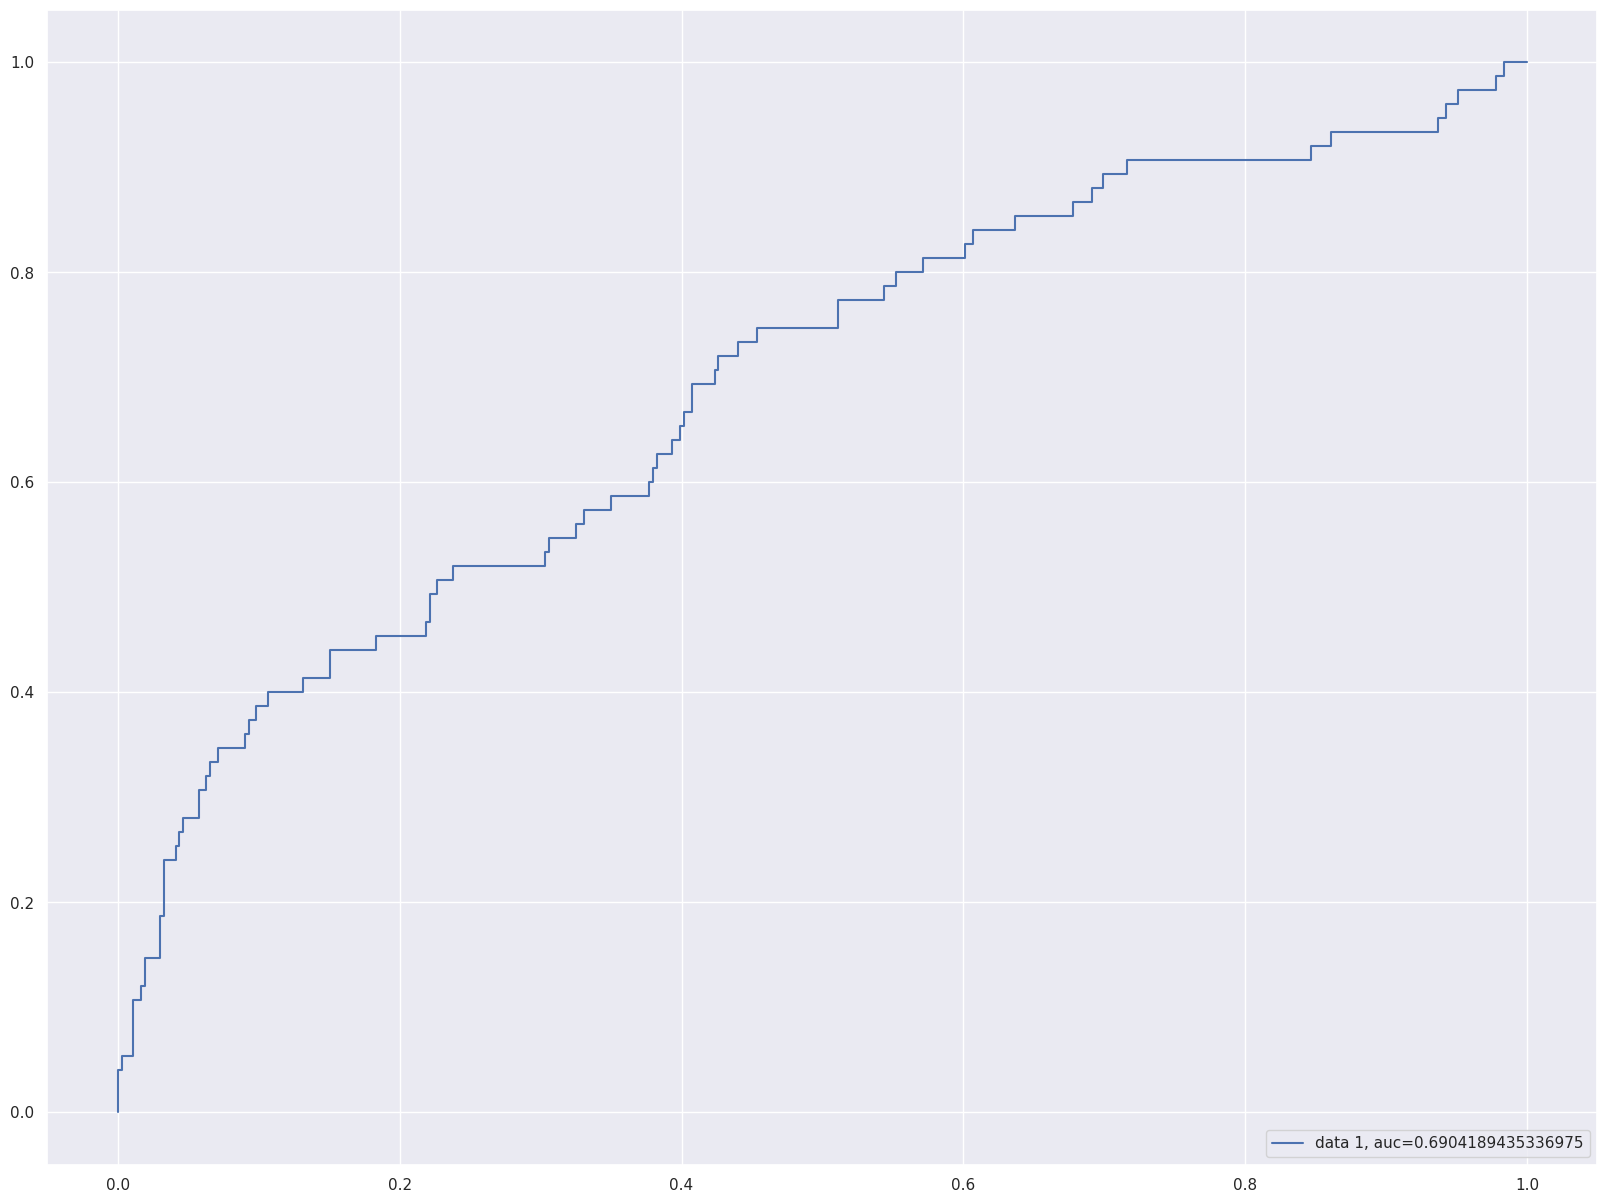

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# 文字列データを数値に変換
label_encoder = LabelEncoder()
X_train_encoded = X_train.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)
X_test_encoded = X_test.apply(lambda col: label_encoder.transform(col) if col.dtype == 'object' else col)

# ロジスティック回帰モデルの訓練
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)

# 予測確率の計算
y_pred_proba = logreg.predict_proba(X_test_encoded)[:, 1]

# ROC曲線とAUCの計算
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# ROC曲線のプロット
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()